In [1]:
# import lib
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
np.set_printoptions(precision=10,suppress=True)
np.random.seed(6789)

(300, 3)


<IPython.core.display.Javascript object>


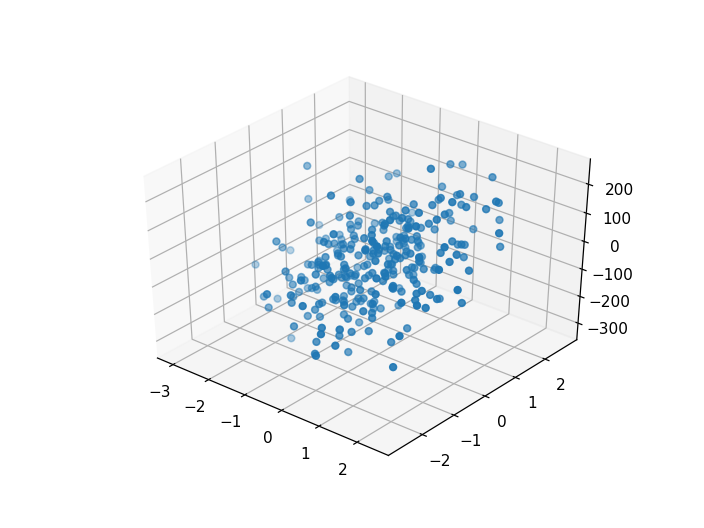

In [6]:
# create data
n_samples  = 300
x, y      = datasets.make_regression(n_samples=n_samples, n_features=2,n_informative=3, noise=80, random_state=0)
X         = np.append(x,y[:,None],1) 

print(X.shape)

x -= np.mean(x, axis = 0)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2])
plt.show()

In [123]:
def g (x): return x*(1/3)
def gg(x): return x*3

def g_grad(x): return ((1/3)*(x*np.sign(x))**(1-(1/3)))*np.sign(x)
def gg_grad(x): return 3*x**2

print(gg(g(-0.23123)))
print(gg(g(0.23123)))
print(gg(g(32132)))
print(gg(g(-32132)))
print(gg(g(-1/331)))
print(-1/331)

-0.23122999999999996
0.23122999999999996
32132.0
-32132.0
-0.0030211480362537764
-0.0030211480362537764


In [ ]:
# simple objective
w1 = np.random.uniform(0,1,size=(2,2))
w2 = np.random.uniform(0,1,size=(2,3))

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)
w1 = _sym_decorrelation(w1)
w2 = _sym_decorrelation(w2)
w1 = w1 / np.sqrt((w1**2).sum(0))
w2 = w2 / np.sqrt((w2**2).sum(0))

m1 = np.zeros_like(w1)
m2 = np.zeros_like(w2)

# simple objective
for iter in range(4000):
    
    y1= X @ w1
    y2= g(y1)
    y3= y2 @ w2
    y4= g(y3)
    y5= gg(y4)
    y6= y5 @ w2.T
    y7= gg(y6)
    y8= y7 @ w1.T
    
    loss = np.sqrt((X-y8)**2)
    
    dgrad_loss = (X-y8)/(np.sqrt( (X-y8)**2) + 1e-8)
    dgrad_w2T  = y5.T @ ((dgrad_loss @ w1) * gg_grad(y6))
    dgrad_w2   = y2.T @(((dgrad_loss @ w1) * gg_grad(y6) @ w2)*gg_grad(y4) ) + dgrad_w2T.T
    
    dgrad_W1T  = y7.T @ dgrad_loss
    dgrad_W1   = X.T@((((((dgrad_loss@w1)* gg_grad(y6))@w2)*gg_grad(y4)*g_grad(y3))@w2.T)*g_grad(y1)) + dgrad_W1T.T

    m1 = 0.9 * m1   + (1-0.9)   * dgrad_W1
    m2 = 0.9 * m2   + (1-0.9)   * dgrad_w2
    
    if iter%1000 == 0 : print("Current loss: " + str(loss.mean()) + "  Weight : " + str(w2.ravel()))
    w1 = w1 - 0.000008 * m1
    w2 = w2 - 0.000008 * m2
    
    w1 = _sym_decorrelation(w1)
    w2 = _sym_decorrelation(w2)
    w1 = w1 / np.sqrt((w1**2).sum(0))
    w2 = w2 / np.sqrt((w2**2).sum(0))
    
recon = y8
# plt.scatter(y4[:,0],y4[:,1]); plt.show()
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(y8[:,0],y8[:,1]);         plt.show()

Current loss: 33.581027941349  Weight : [-0.466554966   0.9686152409 -0.0503870855  0.8844922067  0.2485649111
  0.9987297641]
Current loss: 1.4545320758397262  Weight : [ 0.9999938553 -0.9999938553 -0.0035056306  0.0035056306 -0.0035056306
  0.9999938553]
Current loss: 1.4571836283364679  Weight : [ 0.9999933116 -0.9999933116 -0.0036574175  0.0036574175 -0.0036574175
  0.9999933116]
Current loss: 1.4602183832828697  Weight : [ 0.9999808785 -0.9999808785 -0.0061840594  0.0061840594 -0.0061840594
  0.9999808785]


In [101]:
print(y4.shape)

(200, 2)


(200, 2)
(200, 2)
-1.744011651702943   59.43445833173476   -247.6790298909393   288.82236094566673
0.059170886847916895   6.606406184951791   -24.18528386153794   20.688867296907766
EVD basis vector :  [0.0087124428 0.9999620459]
MY  basis vector :  [0.0053035781 0.9999859359 0.9999859359 0.0053035781]
[[1. 0.]
 [0. 1.]]
MY  basis vector :  [0.6672170756 0.7448633257 0.7448633257 0.6672170756]
[[1. 0.]
 [0. 1.]]


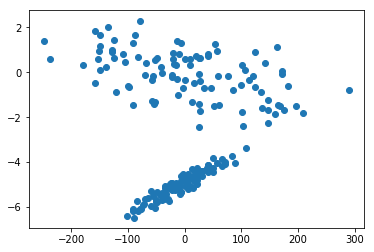

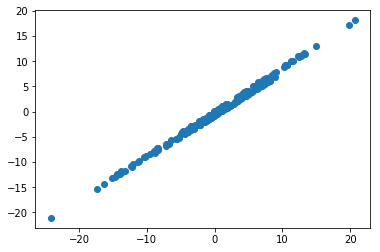

In [175]:
gt_compare = X @ evecs
my_compare = y4
print(gt_compare.shape)
print(my_compare.shape)

print(gt_compare.mean()," ", gt_compare.std()," ", gt_compare.min()," ", gt_compare.max())
print(my_compare.mean()," ", my_compare.std()," ", my_compare.min()," ", my_compare.max())

print("EVD basis vector : ",(good_project*np.sign(good_project)).ravel())
print("MY  basis vector : ",(w1*np.sign(w1)).ravel())
print(w1@w1)
print("MY  basis vector : ",(w2*np.sign(w2)).ravel())
print(w2@w2)

# plt.scatter(range(len(gt_compare)),gt_compare); 
# plt.scatter(range(len(my_compare)),my_compare); plt.show()

plt.scatter(gt_compare[:,0],gt_compare[:,1]);         plt.show()
plt.scatter(my_compare[:,0],my_compare[:,1]);         plt.show()
plt.show()

In [163]:
print(y4)

[[ -4.9886292053  -4.3503816299]
 [-12.1837537347 -10.8998528023]
 [ -2.85375224    -2.5787563917]
 [ 11.2602201164  10.0603801943]
 [ -1.6896430068  -1.3599405577]
 [  8.7894248088   7.693006555 ]
 [-15.1900830953 -13.264077209 ]
 [  1.1173323398   0.9228332093]
 [ 10.6348139096   9.356924537 ]
 [ -8.285554567   -7.2678289332]
 [ -6.3956254132  -5.5699788547]
 [  3.5292411759   3.0965985408]
 [-14.4443416999 -12.5229366231]
 [-10.3000378949  -9.032724542 ]
 [  4.6952042465   4.0477801373]
 [ 12.4544090957  10.8193196327]
 [  1.3087126304   1.1819215263]
 [  4.9998056236   4.1488547971]
 [ 19.8335476246  17.2923616163]
 [  1.6122810181   1.5247223897]
 [ 11.5990025033  10.0938645587]
 [  4.5732304362   3.7559933986]
 [ 13.1679922892  11.6888611137]
 [  1.8309658056   1.5698703207]
 [ 12.8545985564  11.2344965207]
 [ 20.6888672969  18.1476930689]
 [ 10.2718998712   8.7783113909]
 [ -0.0407950841  -0.0854649762]
 [ 12.3724611704  10.9732498753]
 [  8.3466544989   7.1407678938]
 [-10.0973

In [165]:
print(X@evecs)

[[  59.5715212668   -0.1594663627]
 [ 147.1128879508   -2.2584373754]
 [  34.6093819692   -0.703900618 ]
 [-135.8834792744    1.9970991213]
 [  19.5073206416    0.7178565778]
 [-105.1243101222    0.4720442226]
 [ 181.4945151727   -0.6040056274]
 [ -13.0386043348   -0.3147457219]
 [-127.4831015671    0.9024485045]
 [  99.1912620262   -0.552666641 ]
 [  76.329548769    -0.1542175436]
 [ -42.255692274     0.2412473657]
 [ 172.0537633036    0.0372365274]
 [ 123.2951749733   -0.6724467459]
 [ -55.792102971    -0.1675394481]
 [-148.4781312376    0.1148320134]
 [ -15.8676339268    0.3181827652]
 [ -58.4590929066   -1.2765974426]
 [-236.8198788041    0.6090292573]
 [ -19.9530741551    0.8586826988]
 [-138.384277738     0.2269357339]
 [ -53.2421348963   -1.432074474 ]
 [-158.4574310342    1.8186946333]
 [ -21.7061247386   -0.1239590361]
 [-153.6472917179    0.5776274394]
 [-247.6790298909    1.3804514198]
 [-121.6035789323   -0.8913449991]
 [   0.7813526194   -0.3404947405]
 [-148.8287130869   

[-0.0087124428 -0.9999620459]


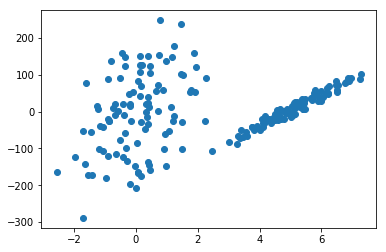

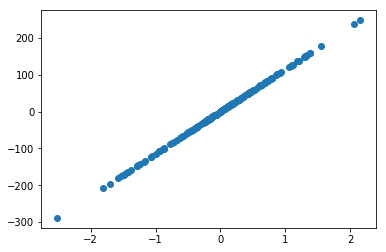

In [164]:
cov = X.T @ X / X.shape[0]
evals,evecs = np.linalg.eig(cov)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
print(evecs[0,:])
good_project = evecs[0,:][:,None]
recon_gt = (X @ good_project @ good_project.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon_gt[:,0],recon_gt[:,1]); plt.show()

(200, 2)


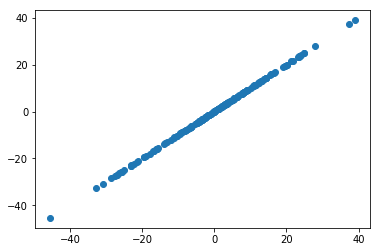

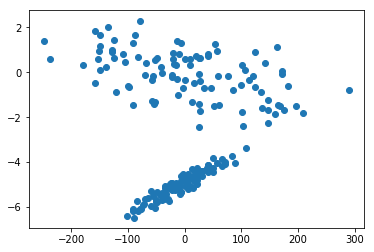

In [96]:
gt_2d = X @evecs
print(gt_2d.shape)
plt.scatter(y4[:,0],y4[:,1]); plt.show()
plt.scatter(gt_2d[:,0],gt_2d[:,1]); plt.show()

In [146]:
good_project

array([[-0.02331227],
       [-0.99972823]])

In [147]:
w

array([[0.17628245],
       [0.98433963]])

[[0.53163258]
 [0.84697509]]
Current loss: 243.18822607516861  Weight : [0.53163258 0.84697509]
Current loss: 303.25917148804814  Weight : [0.5904391  0.80708219]
Current loss: 339.95656698581485  Weight : [0.62344997 0.78186324]


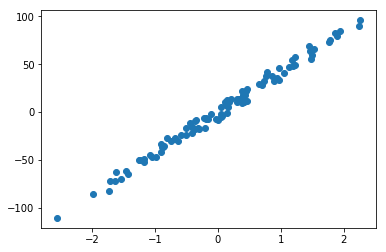

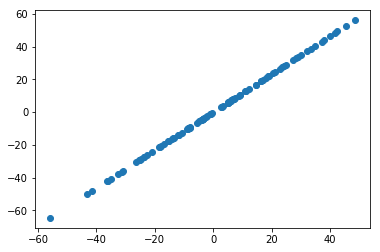

[[0.65277955]
 [0.75754792]]


In [189]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T @ loss @ w) + (w.T@X.T@loss).T + 0.01*w
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%1000 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.00008 * (m_hat/(np.sqrt(v_hat)+1e-8))
    w = w / np.sqrt((w**2).sum())

recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

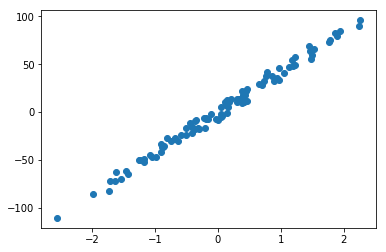

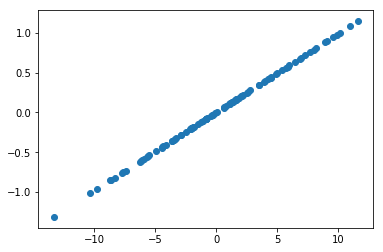

[[0.99518299]
 [0.09803477]]


In [66]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); 
plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

[[0.96485399]
 [0.26278656]]
Current loss: 853.0707262825993  Weight : [0.96485399 0.26278656]
Current loss: 0.00504240287753152  Weight : [0.02331227 0.99972823]
Current loss: 0.00504240287753152  Weight : [0.02331227 0.99972823]


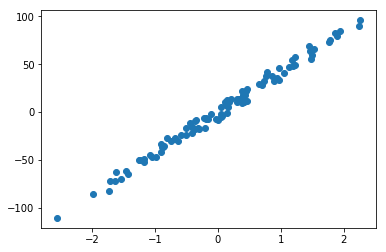

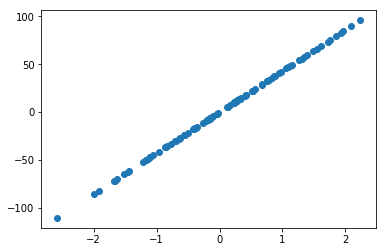

[[0.02331227]
 [0.99972823]]


In [190]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (np.eye(2) + 0.00008 * X.T @ X) @ w
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%1000 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - grad
    w = w / np.sqrt((w**2).sum())

recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

[[0.14193065]
 [0.9898766 ]]
Current loss: 13.11429302103555  Weight : [0.14193065 0.9898766 ]
Current loss: 0.005042402877531518  Weight : [0.02331227 0.99972823]
Current loss: 0.005042402877531518  Weight : [0.02331227 0.99972823]


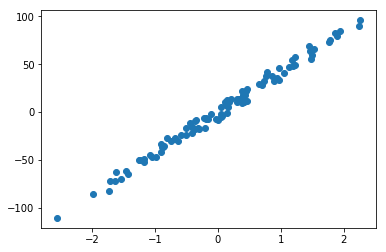

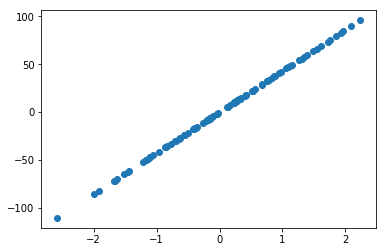

[[0.02331227]
 [0.99972823]]


In [161]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T@X@w)
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%1000 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w + grad
    w = w / np.sqrt((w**2).sum())

recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [56]:
# simple objective
w = np.random.randn(2,1)
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[[-0.99090501]
 [ 0.4142096 ]]
[[-0.92263583]
 [ 0.3856723 ]]
1.0


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. NumPy?, H., Hoogendoorn, E., Feicho, E., Travnik, J., & Hsu, W. (2014). How to normalize an array in NumPy?. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
4. An overview of gradient descent optimization algorithms. (2016). Sebastian Ruder. Retrieved 30 March 2019, from http://ruder.io/optimizing-gradient-descent/index.html#adam
5. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 30 March 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-resultsa